test_psd: 7456


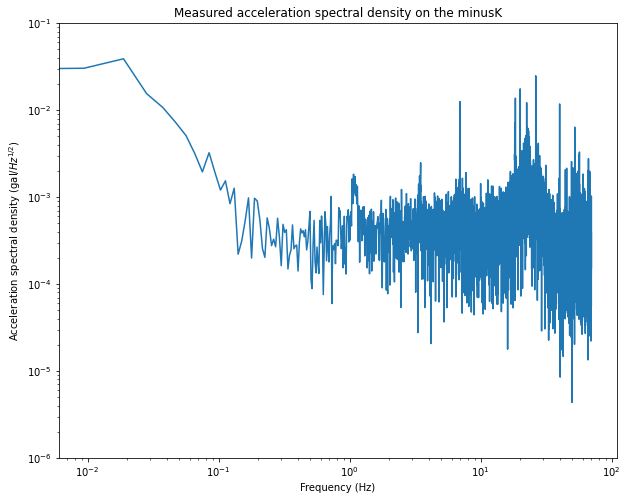

In [1]:
#######################
# Dated: 28.07.2021
# Author: SH
# With Functions Allain Variance Wilcoxon using the variables names as done in the previous codes
#######################

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

#Freq_Hz Accel_g Accel_main
#freq = accel_matrix(:,1);   % Hz
#raw_data_g = accel_matrix(:,2);   % g
#psd_g = accel_matrix(:,3);    % g/sqrt(Hz)


#% allanvarianceWilcoxon.m
#% Calculates Allan variance from Wilcoxon accelerometer data and estimates
#% interferometer sensitivity.


#clear all


#%% Importing data

#%accel_matrix = importAccelFile('10_5_21_ITE_ ASD.csv');
#accel_matrix =  readmatrix('10_5_21_ITE_ ASD.csv');
#% The PSD is already calculated in Matt's code and is included in this CSV

#freq = accel_matrix(:,1);   % Hz
#raw_data_g = accel_matrix(:,2);   % g
#psd_g = accel_matrix(:,3);    % g/sqrt(Hz)

#% Converting to different units for convenience
#raw_data_gal = raw_data_g*980;  % 1 m/s^2 = 100 gal
#psd_si = psd_g*9.8; % in m/s^2
#psd_gal = psd_g*980;    % in gal



sensor_data = pd.read_csv('10_5_21_ITE_ASD.csv')
accData=sensor_data.values.tolist()
accData=np.asarray([np.asarray(elem) for elem in accData])
sensor_data['acc_z_scaled'] = sensor_data['Accel_main']

test_data_for_fft = np.array(sensor_data['acc_z_scaled'])
fs = 70.008#266#272.628
test_fft =  sp.fftpack.fft(test_data_for_fft)
time_step  = 1.0/fs
test_psd = np.abs(test_fft)**2

print("test_psd:",np.size(test_psd))

freq = sp.fftpack.fftfreq(len(test_psd), time_step)
##################################
#Fetch Frequency Column from the file directly
sensor_data['frq'] = sensor_data['Freq_Hz']
freq = np.array(sensor_data['frq'])

test_psd = test_data_for_fft
test_psd_si = test_psd*9.8;
test_psd_gal = test_psd*980;
##################################

#figure(926)
#loglog(freq,psd_gal)
#xlabel('Frequency (Hz)')
#ylabel('Acceleration spectral density (gal/Hz^{1/2})')

figure,ax=plt.subplots(figsize=(10, 8))
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(freq, test_psd_gal)

ax.set_xlabel(r'Frequency (Hz)',fontsize=10)
ax.set_ylabel(r'Acceleration spectral density (gal/$Hz^{1/2}$)',fontsize=10)
ax.set_title('Measured acceleration spectral density on the minusK')
ax.set_ylim(1e-6,1e-1)
plt.savefig('figure1.pdf')

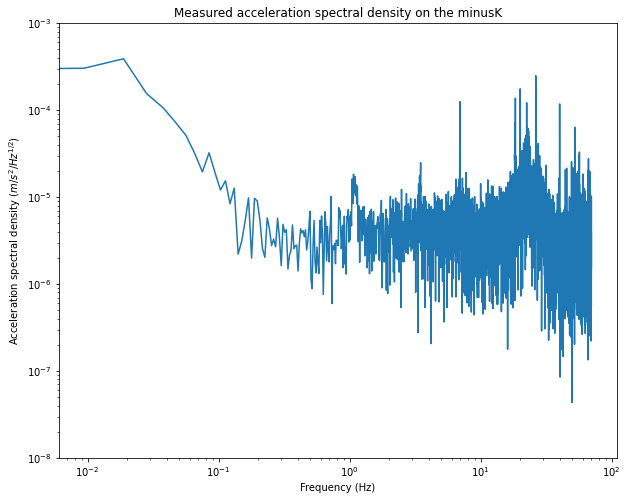

In [2]:
#figure(930)
#loglog(freq,psd_si)
#xlabel('Frequency (Hz)')
#ylabel('Acceleration spectral density (m/s^2/Hz^{1/2})')
#title('Measured acceleration spectral density on the minusK')
figure,ax=plt.subplots(figsize=(10, 8))
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(freq, test_psd_si)

ax.set_xlabel(r'Frequency (Hz)',fontsize=10)
ax.set_ylabel(r'Acceleration spectral density ($m/s^2/Hz^{1/2}$)',fontsize=10)
ax.set_title('Measured acceleration spectral density on the minusK')
ax.set_ylim(1e-8,1e-3)
plt.savefig('figure2.pdf')

<ipython-input-3-4db5cfeb9bdc>:39: RuntimeWarning: divide by zero encountered in true_divide
  H0=(4*2*np.pi*freqArr*2*np.pi*Omg/((2*np.pi*freqArr)**2-(2*np.pi*Omg)**2))*np.sin(2*np.pi*(freqArr)*(T+tau)/2)*(np.cos(2*np.pi*freqArr*(T+tau)/2.)+((2*np.pi*Omg)/(2*np.pi*freqArr))*np.sin(2*np.pi*freqArr*T/2.))
<ipython-input-3-4db5cfeb9bdc>:39: RuntimeWarning: invalid value encountered in multiply
  H0=(4*2*np.pi*freqArr*2*np.pi*Omg/((2*np.pi*freqArr)**2-(2*np.pi*Omg)**2))*np.sin(2*np.pi*(freqArr)*(T+tau)/2)*(np.cos(2*np.pi*freqArr*(T+tau)/2.)+((2*np.pi*Omg)/(2*np.pi*freqArr))*np.sin(2*np.pi*freqArr*T/2.))
<ipython-input-3-4db5cfeb9bdc>:41: RuntimeWarning: divide by zero encountered in true_divide
  H_a=keff**2/(2*np.pi*freqArr)**4*np.abs(H_1)
<ipython-input-3-4db5cfeb9bdc>:44: RuntimeWarning: divide by zero encountered in true_divide
  S_phi = (keff**2) / (freqArr**4) * test_psd_si


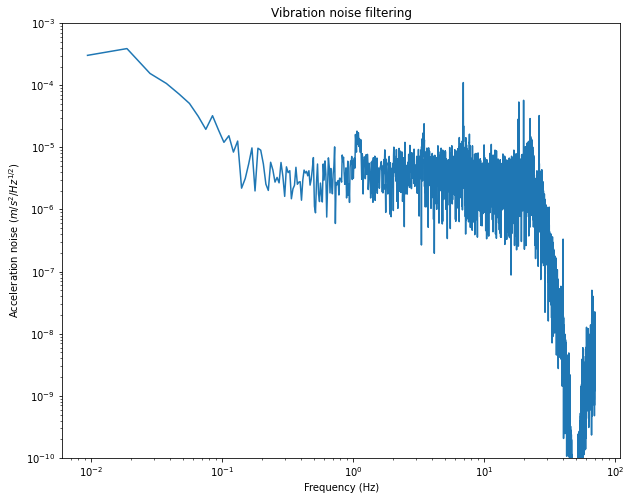

In [3]:
#Omega = 4e4;    % Rabi frequency, Hz        ours is 4e4
#tau = 1/(2*Omega);  % pi pulse length, s
#TT = 20e-3; % interferometer time T, s      ours is 20e-3 max
#wavelength = 780e-9;    % m
#keff = 4*pi/wavelength;
Omg=4*1e4 #Rabi frequency, Hz        ours is 4e4
tau=(1/(2*Omg)) #pi pulse length, s
T=20e-3 # interferometer time T, s      ours is 20e-3 max
wavelength = 780e-9
keff=4*np.pi/wavelength
# Transfer function


Tc = 6; # cycle rep rate, s
fc = 1/Tc;

# Transfer function
# Direct from equation 2.54 from Rosi's thesis
#HH = ( 4*2*pi*freqpoints*2*pi*Omega ./ ((2*pi*freqpoints).^2 - (2*pi*Omega)^2) ) .* sin(2*pi*freqpoints*(TT + tau)/2) .* ( cos(2*pi*freqpoints*(TT + tau)/2) + (2*pi*Omega./(2*pi*freqpoints)).*sin(2*pi*freqpoints*TT/2)); % eqn 2.54 Rosi thesis
#HH_a_sq = ((keff^2)./((2*pi*freqpoints).^4)) .* abs(HH.^2); # transfer function squared
#HH_a_0_sq = ((keff^2)./((2*pi*freqpoints(2)).^4)) .* abs(HH(2).^2); # H(0) is undefined, so taking the smallest non-zero frequency and normalising to that
#HH_a_norm = HH_a_sq./HH_a_0_sq; # Normalised transfer function

#acc_trans = HH_a_norm.*psd_si;  # Applying the transfer function to the acceleration profile
# This should show how the interferometer itself filters acceleration noise

# Phase noise
#S_phi = keff^2 ./ freqpoints.^4 .* psd_si;  # I don't use this for anything, can ignore

#figure(931)
#loglog(freq,acc_trans)
#xlabel('Frequency (Hz)')
#ylabel('Acceleration noise (m/s^2/Hz^{1/2})')
#title('Vibration noise filtering')
#ylim([1e-10 1e-3])
freqArr=freq
testArr=test_psd

H0=(4*2*np.pi*freqArr*2*np.pi*Omg/((2*np.pi*freqArr)**2-(2*np.pi*Omg)**2))*np.sin(2*np.pi*(freqArr)*(T+tau)/2)*(np.cos(2*np.pi*freqArr*(T+tau)/2.)+((2*np.pi*Omg)/(2*np.pi*freqArr))*np.sin(2*np.pi*freqArr*T/2.))
H_1=H0*H0
H_a=keff**2/(2*np.pi*freqArr)**4*np.abs(H_1)
HH_a_norm = H_a/(H_a[1])
acc_trans = HH_a_norm*test_psd_si
S_phi = (keff**2) / (freqArr**4) * test_psd_si

figure,ax=plt.subplots(figsize=(10, 8))
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(freqArr, acc_trans)

ax.set_xlabel(r'Frequency (Hz)',fontsize=10)
ax.set_ylabel(r'Acceleration noise ($m/s^2/Hz^{1/2}$)',fontsize=10)
ax.set_title('Vibration noise filtering')
ax.set_ylim(1e-10,1e-3)
plt.savefig('figure3.pdf')

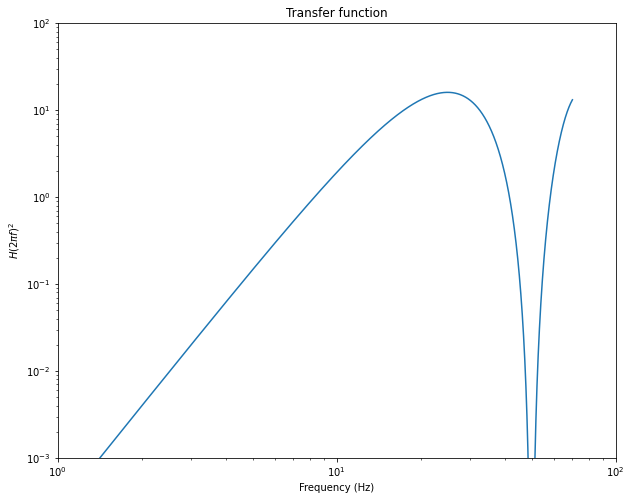

In [4]:

#figure(927)
#loglog(freqpoints,HH.^2)
#xlabel('Frequency (Hz)')
#ylabel('H(2{\pi}f)^2')
#ylim([0.001 20])


figure,ax=plt.subplots(figsize=(10, 8))
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(freqArr, H_1)

ax.set_xlabel(r'Frequency (Hz)',fontsize=10)
ax.set_ylabel(r'$H(2{\pi}f)^2$',fontsize=10)
ax.set_title('Transfer function')
ax.set_ylim(1e-3,1e2)
ax.set_xlim(1e0,1e2)
plt.savefig('figure4.pdf')

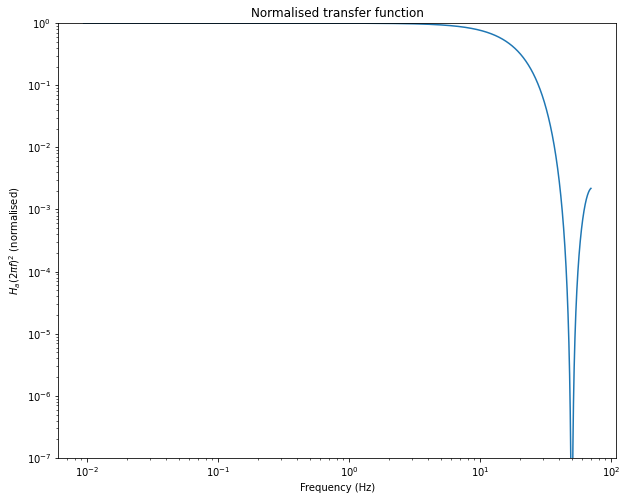

In [5]:
#figure(928)
#loglog(freqpoints,HH_a_norm)
#xlabel('Frequency (Hz)')
#ylabel('H_a(2{\pi}f)^2 (normalised)')
#title('Normalised transfer function')
#ylim([1e-7 1])


figure,ax=plt.subplots(figsize=(10, 8))
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(freqArr, HH_a_norm)

ax.set_xlabel(r'Frequency (Hz)',fontsize=10)
ax.set_ylabel(r'$H_a(2{\pi}f)^2$ (normalised)',fontsize=10)
ax.set_title('Normalised transfer function')
ax.set_ylim(1e-7,1e0)
plt.savefig('figure5.pdf')

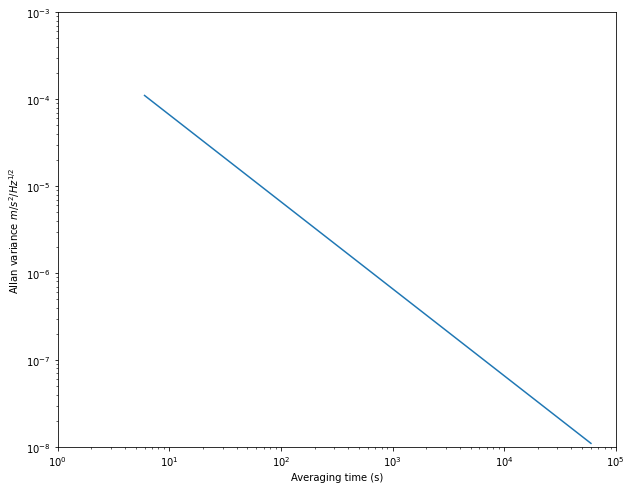

In [6]:
# Allan variance

mm = 10000   # total number of repetitions of the experiment
total_time = mm*Tc; # total integration time
#tt = 1:1:mm;    # number of measurement cycles    
tt = np.linspace(1,mm,mm)

# Sampling the transfer function and acceleration PSD.
# This follows equation 2.68 from Rosi.
# For the acceleration PSD data, we have to sample the spectrum in steps of
# fc. In the code below, I set up the frequency sample points that I want,
# then use the "find" function to grab the closest frequency to the one I
# want, since the accelerometer data won't have the exact frequency.

max_nn = int(np.round(max(freq)/fc))#;   % Total number of frequency points
#freq_sample_points = np.min(freq):fc:np.max(freq)#;  % Need to sample our measured PSD, so have to pick out the frequencies
freq_sample_points = np.linspace(np.min(freq),np.max(freq),max_nn+1)
#print(freq_sample_points)
#freq_index_array = [];

# Loop through each multple of fc and grab the index of the nearest
# frequency in the data.
# We are looking for frequencies that fall in a window of +/- fc/30. In
# case of multiple results, we just grab the first result that's found.
# If Tc is reduced, then we must decrease the window size. Eg. Tc = 1 s
# needs +/-fc/195 in order to retrieve sensible results.

#for nn = 1:1:max_nn
    
#    freq_index = find(freq > (freq_sample_points(nn) - fc/30) & freq < (freq_sample_points(nn) + fc/30),1);
#    freq_index_array = [freq_index_array; freq_index];
    
#end
x = np.linspace(0,420,max_nn+1)
freq_index=0.0*x
for tau in x:
    #print(freq_sample_points[x==tau])
    #print(np.where((freq > (freq_sample_points[x==tau] - fc/30)) & (freq < (freq_sample_points[x==tau] + fc/30)))[0][0])
    freq_index[x==tau] = np.where((freq > (freq_sample_points[x==tau] - fc/30)) & (freq < (freq_sample_points[x==tau] + fc/30)))[0][0]
    #print(freq_index[x==tau])
    
#freq_samples = freq(freq_index_array);  % for plotting later
#freq_samples = (freq > np.min(freq)) & (freq <= np.max(freq))
#freq_index_array = np.where((freq > np.min(freq)) & (freq <= np.max(freq)))

#nn = 1:1:max_nn;  % for summing over. fc*nn <= max(freq)
nn = np.linspace(1,max_nn+1,max_nn+1)

#% Now we use Rosi equation 2.68:
HH_nn = ( 4*2*np.pi*nn*fc*2*np.pi*Omg / ((2*np.pi*nn*fc)**2 - (2*np.pi*Omg)**2) ) * np.sin(2*np.pi*nn*fc*(T + tau)/2) * ( np.cos(2*np.pi*nn*fc*(T + tau)/2) + (2*np.pi*Omg/(2*np.pi*nn*fc))*np.sin(2*np.pi*nn*fc*T/2))

HH_nn_sq = np.abs(HH_nn)**2;
HH_total = HH_nn_sq / (2*np.pi*nn*fc)**4;

#S_a = test_psd_si(freq_index_array);   # acceleration noise density at sampled frequency values
#freqArr=freq[freq_samples]
S_a = freq_index*0;
freq_samples = freq_index*0;
for tau in x:
    #print(freq_index[x==tau])
    #print(test_psd_si[int(freq_index[x==tau])])
    S_a[x==tau] = test_psd_si[int(freq_index[x==tau])]
    freq_samples[x==tau] = freq[int(freq_index[x==tau])]


av_nn = HH_total*S_a
av_sum = np.sum(av_nn);

# Allan variance for acceleration, as per Freier thesis equation 2.16:
av_g = (keff**2)/(tt*Tc) * av_sum / ((keff**2) * (T**4));


#figure(929)
#loglog((1:1:mm)*Tc,av_g)
#xlabel('Averaging time (s)')
#ylabel('Allan variance m/s^2/Hz^{1/2}')

figure,ax=plt.subplots(figsize=(10, 8))
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(tt*Tc, av_g)

ax.set_xlabel(r'Averaging time (s)',fontsize=10)
ax.set_ylabel(r'Allan variance $m/s^2/Hz^{1/2}$',fontsize=10)
ax.set_ylim(1e-8,1e-3)
ax.set_xlim(1e0,1e5)
plt.savefig('figure6.pdf')


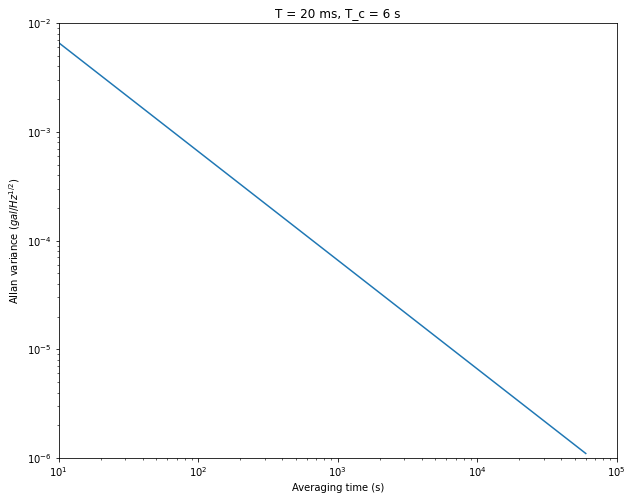

In [7]:

#% The important plot!
#figure(934)
#loglog((1:1:mm)*Tc,av_g*100)
#xlabel('Averaging time (s)')
#ylabel('Allan variance (gal/Hz^{1/2})')
#title('T = 20 ms, T_c = 6 s')
#axis tight

figure,ax=plt.subplots(figsize=(10, 8))
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(tt*Tc, av_g*100)

ax.set_xlabel(r'Averaging time (s)',fontsize=10)
ax.set_ylabel(r'Allan variance ($gal/Hz^{1/2}$)',fontsize=10)
ax.set_title('T = 20 ms, T_c = 6 s')
ax.set_ylim(1e-6,1e-2)
ax.set_xlim(1e1,1e5)
plt.savefig('figure7.pdf')

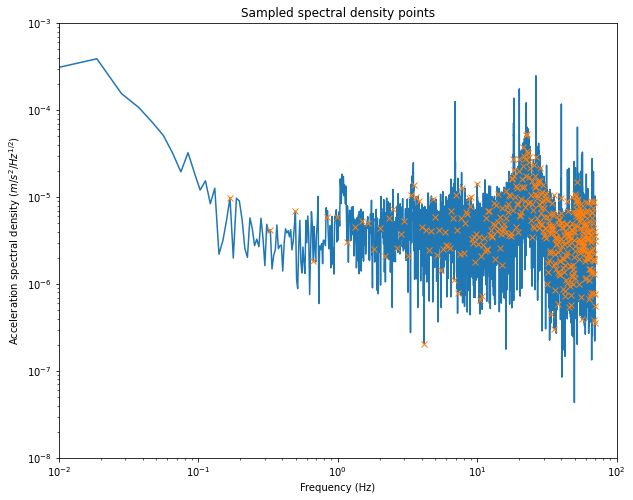

In [8]:

#% Useful plot to check if the acceleration PSD sampling is working as expected
#figure(933)
#loglog(freq,psd_si)
#hold on
#loglog(freq_samples,S_a,'x')
#hold off
#xlabel('Frequency (Hz)')
#ylabel('Acceleration spectral density (m/s^2/Hz^{1/2})')
#title('Sampled spectral density points')

figure,ax=plt.subplots(figsize=(10, 8))
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(freq, test_psd_si)

ax.set_xlabel(r'Frequency (Hz)',fontsize=10)
ax.set_ylabel(r'Acceleration spectral density ($m/s^2/Hz^{1/2}$)',fontsize=10)
ax.set_ylim(1e-8,1e-3)
ax.set_xlim(1e-2,1e2)
ax.set_title('Sampled spectral density points')

ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(freq_samples,S_a,'x')
plt.savefig('figure8.pdf')


In [9]:
print(av_sum)

1.056672765443853e-10


In [10]:

print(freq_index[0])
ind=int(freq_index[0])
print(test_psd_si[ind])

0.0
7.144200000000001e-19
